# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_RAR_1.csv")
df.head()

,userName,score,at,content
0,Ahmad Sajidin (Abi Fatih),5,2024-06-16 05:27:12,"Bermanfaat, utk ekstrak data zip/rar"
1,Yanuarius Tahu seran,5,2024-06-13 12:18:28,bagus
2,Alif Zaim,5,2024-06-08 14:08:53,Apk ini cocok untuk install mod mcpe
3,Bangun Kesiangan,5,2024-06-05 02:43:39,Gratis dan fungsional
4,Ade Firman Santoni,5,2024-06-04 12:43:29,"Simple, sangat berguna, mantap pokoknya"


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Bermanfaat, utk ekstrak data zip/rar",Ahmad Sajidin (Abi Fatih),2024-06-16 05:27:12
1,bagus,Yanuarius Tahu seran,2024-06-13 12:18:28
2,Apk ini cocok untuk install mod mcpe,Alif Zaim,2024-06-08 14:08:53
3,Gratis dan fungsional,Bangun Kesiangan,2024-06-05 02:43:39
4,"Simple, sangat berguna, mantap pokoknya",Ade Firman Santoni,2024-06-04 12:43:29
...,...,...,...
1495,😁,Wahyu Project,2021-09-09 02:05:00
1496,Tolong apknya di support di android 11,Muhammad Yusril Bachtiar,2021-09-08 13:05:15
1497,"Apk bagus,tpi gk semua file bisa kebuka",Muhammad Prima Ataya Bintang (Bintang),2021-09-08 11:16:06
1498,Sangat bagus,Anis Setyaningsih,2021-09-07 16:52:00


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1500 non-null   object
 1   userName  1500 non-null   object
 2   at        1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,1500,1500,1500
unique,1143,1495,1500
top,Ok,Zainal Abidin,2024-06-16 05:27:12
freq,77,2,1


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1143, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bermanfaat utk ekstrak data ziprar,Ahmad Sajidin (Abi Fatih),2024-06-16 05:27:12
1,bagus,Yanuarius Tahu seran,2024-06-13 12:18:28
2,apk ini cocok untuk install mod mcpe,Alif Zaim,2024-06-08 14:08:53
3,gratis dan fungsional,Bangun Kesiangan,2024-06-05 02:43:39
4,simple sangat berguna mantap pokoknya,Ade Firman Santoni,2024-06-04 12:43:29
...,...,...,...
1488,aneh tiba keluar sendiri dan ga ada riwayat pe...,Roy Koy,2021-09-11 10:50:44
1490,keren itu doang,Novan Sumatri,2021-09-10 06:03:41
1491,mantabbbbbbbbb,Iwan Setiawan,2021-09-09 11:09:53
1496,tolong apknya di support di android,Muhammad Yusril Bachtiar,2021-09-08 13:05:15


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bermanfaat utk ekstrak data ziprar,Ahmad Sajidin (Abi Fatih),2024-06-16 05:27:12
1,bagus,Yanuarius Tahu seran,2024-06-13 12:18:28
2,aplikasi ini cocok untuk install mod mcpe,Alif Zaim,2024-06-08 14:08:53
3,gratis dan fungsional,Bangun Kesiangan,2024-06-05 02:43:39
4,simple sangat berguna mantap pokenapanya,Ade Firman Santoni,2024-06-04 12:43:29
...,...,...,...
1488,aneh tiba keluar sendiri dan ga ada riwayat pe...,Roy Koy,2021-09-11 10:50:44
1490,keren itu doang,Novan Sumatri,2021-09-10 06:03:41
1491,mantabbbbbbbbb,Iwan Setiawan,2021-09-09 11:09:53
1496,tolong aplikasinya di support di android,Muhammad Yusril Bachtiar,2021-09-08 13:05:15


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bermanfaat utk ekstrak data ziprar,Ahmad Sajidin (Abi Fatih),2024-06-16 05:27:12
1,bagus,Yanuarius Tahu seran,2024-06-13 12:18:28
2,aplikasi cocok install mod mcpe,Alif Zaim,2024-06-08 14:08:53
3,gratis fungsional,Bangun Kesiangan,2024-06-05 02:43:39
4,simple sangat berguna mantap pokenapanya,Ade Firman Santoni,2024-06-04 12:43:29
...,...,...,...
1488,aneh tiba keluar sendiri ga riwayat pengekstra...,Roy Koy,2021-09-11 10:50:44
1490,keren doang,Novan Sumatri,2021-09-10 06:03:41
1491,mantabbbbbbbbb,Iwan Setiawan,2021-09-09 11:09:53
1496,aplikasinya support android,Muhammad Yusril Bachtiar,2021-09-08 13:05:15


# **Tokenize**

In [18]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                [bermanfaat, utk, ekstrak, data, ziprar]
1                                                 [bagus]
2                   [aplikasi, cocok, install, mod, mcpe]
3                                    [gratis, fungsional]
4          [simple, sangat, berguna, mantap, pokenapanya]
                              ...                        
1488    [aneh, tiba, keluar, sendiri, ga, riwayat, pen...
1490                                       [keren, doang]
1491                                     [mantabbbbbbbbb]
1496                      [aplikasinya, support, android]
1497        [aplikasi, bagustpi, gk, semua, file, kebuka]
Name: content, Length: 1143, dtype: object

# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_RAR_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_RAR_1.csv', encoding = 'latin1')
df_clean

,content
0,manfaat utk ekstrak data ziprar
1,bagus
2,aplikasi cocok install mod mcpe
3,gratis fungsional
4,simple sangat guna mantap pokenapanya
...,...
1138,aneh tiba keluar sendiri ga riwayat ekstra jug...
1139,keren doang
1140,mantabbbbbbbbb
1141,aplikasi support android


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_RAR_1.csv', encoding='latin1')

In [24]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [29]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RAR_1.csv')

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RAR_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,manfaat utk ekstrak data ziprar,benefits for extracting ziprar data
1,1,bagus,Good.
2,2,aplikasi cocok install mod mcpe,application matches install mcpe mod
3,3,gratis fungsional,functional free
4,4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...
...,...,...,...
1138,1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...
1139,1139,keren doang,Cool.
1140,1140,mantabbbbbbbbb,Great.
1141,1141,aplikasi support android,Android support application


# **Labeling**

In [65]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_RAR_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,manfaat utk ekstrak data ziprar,benefits for extracting ziprar data
1,1,bagus,Good.
2,2,aplikasi cocok install mod mcpe,application matches install mcpe mod
3,3,gratis fungsional,functional free
4,4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...
...,...,...,...
1138,1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...
1139,1139,keren doang,Cool.
1140,1140,mantabbbbbbbbb,Great.
1141,1141,aplikasi support android,Android support application


In [66]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [67]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 576
Netral = 469
Negatif = 98

Total Data Seluruhnya : 1143


In [69]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,manfaat utk ekstrak data ziprar,benefits for extracting ziprar data,Netral
1,1,bagus,Good.,Positif
2,2,aplikasi cocok install mod mcpe,application matches install mcpe mod,Positif
3,3,gratis fungsional,functional free,Positif
4,4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...,Positif
...,...,...,...,...
1138,1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...,Negatif
1139,1139,keren doang,Cool.,Positif
1140,1140,mantabbbbbbbbb,Great.,Positif
1141,1141,aplikasi support android,Android support application,Netral


In [70]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,manfaat utk ekstrak data ziprar,benefits for extracting ziprar data,Netral
1,bagus,Good.,Positif
2,aplikasi cocok install mod mcpe,application matches install mcpe mod,Positif
3,gratis fungsional,functional free,Positif
4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...,Positif
...,...,...,...
1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...,Negatif
1139,keren doang,Cool.,Positif
1140,mantabbbbbbbbb,Great.,Positif
1141,aplikasi support android,Android support application,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



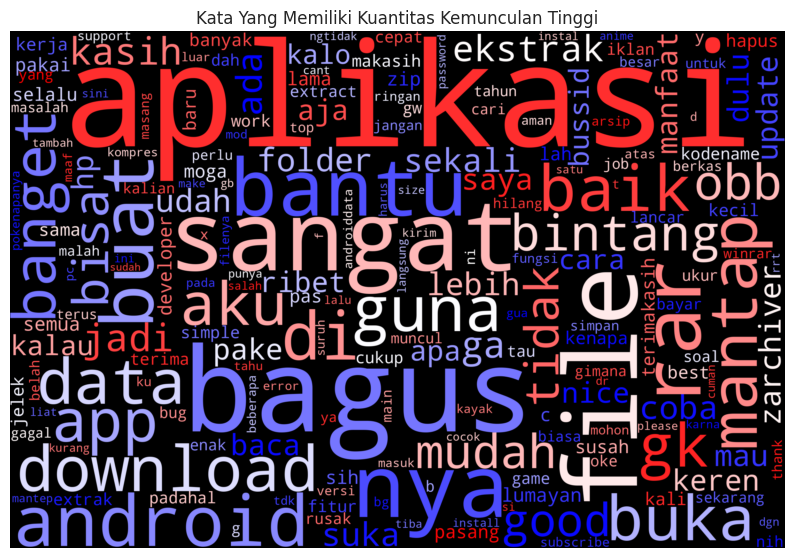

In [71]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


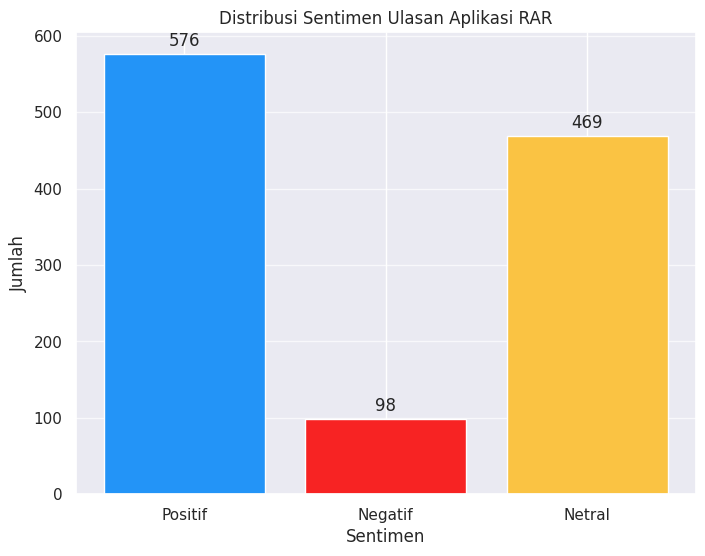

In [72]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RAR")


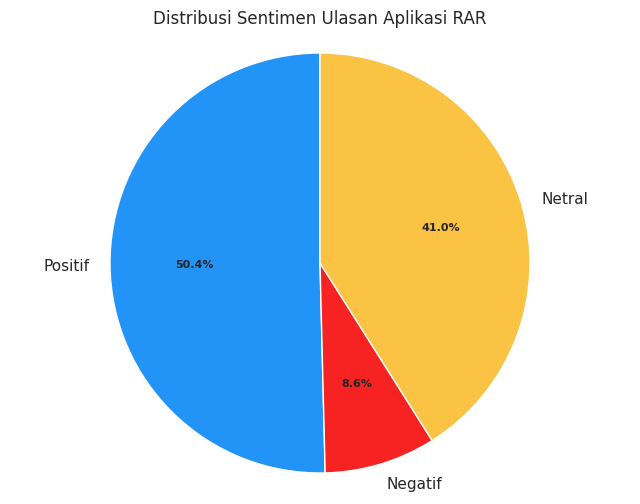

In [73]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RAR")

In [74]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,bagus,Good.,Positif
2,aplikasi cocok install mod mcpe,application matches install mcpe mod,Positif
3,gratis fungsional,functional free,Positif
4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...,Positif
5,nice,Nice.,Positif
...,...,...,...
1135,emang lebih bagus winrar zarchiver lebih mudah...,It's even better. Winrar zarchiver is easier t...,Positif
1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...,Negatif
1139,keren doang,Cool.,Positif
1140,mantabbbbbbbbb,Great.,Positif


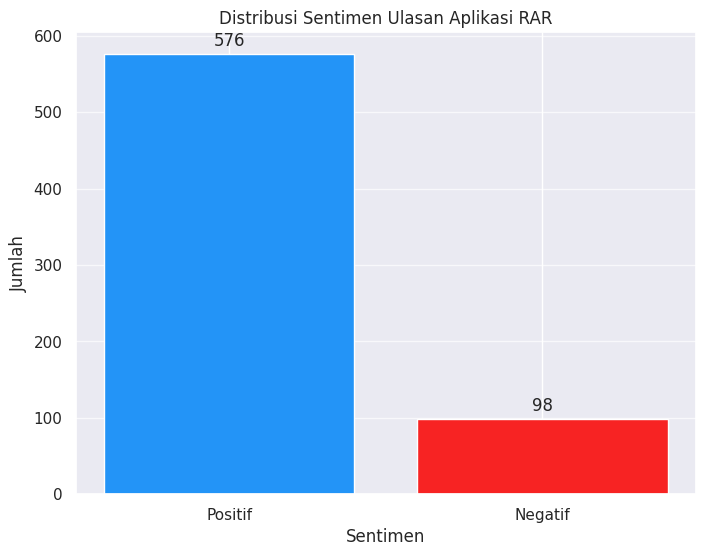

In [75]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RAR")


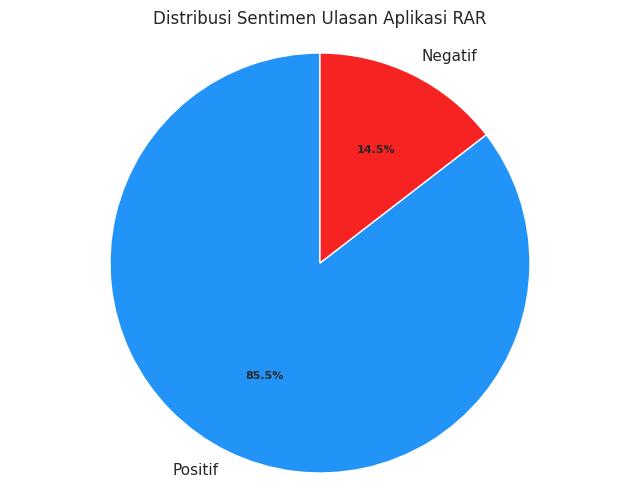

In [76]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi RAR")

In [77]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
1,bagus,Good.,0
2,aplikasi cocok install mod mcpe,application matches install mcpe mod,0
3,gratis fungsional,functional free,0
4,simple sangat guna mantap pokenapanya,It's simple. It's good for you. It's good for ...,0
5,nice,Nice.,0
...,...,...,...
1135,emang lebih bagus winrar zarchiver lebih mudah...,It's even better. Winrar zarchiver is easier t...,0
1138,aneh tiba keluar sendiri ga riwayat ekstra jug...,It's weird to be out on your own. No extra his...,1
1139,keren doang,Cool.,0
1140,mantabbbbbbbbb,Great.,0


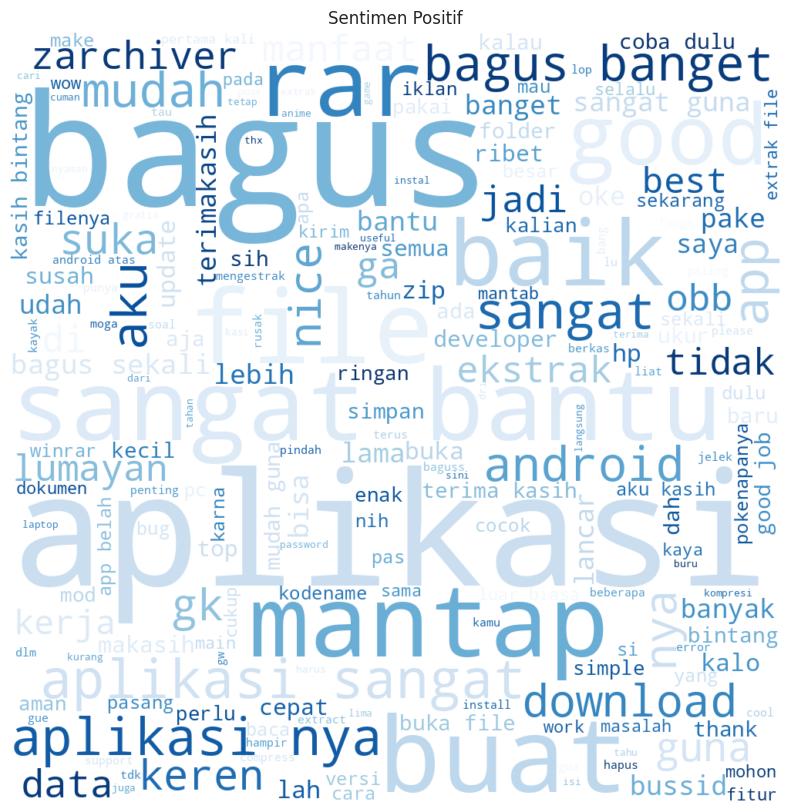

In [78]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

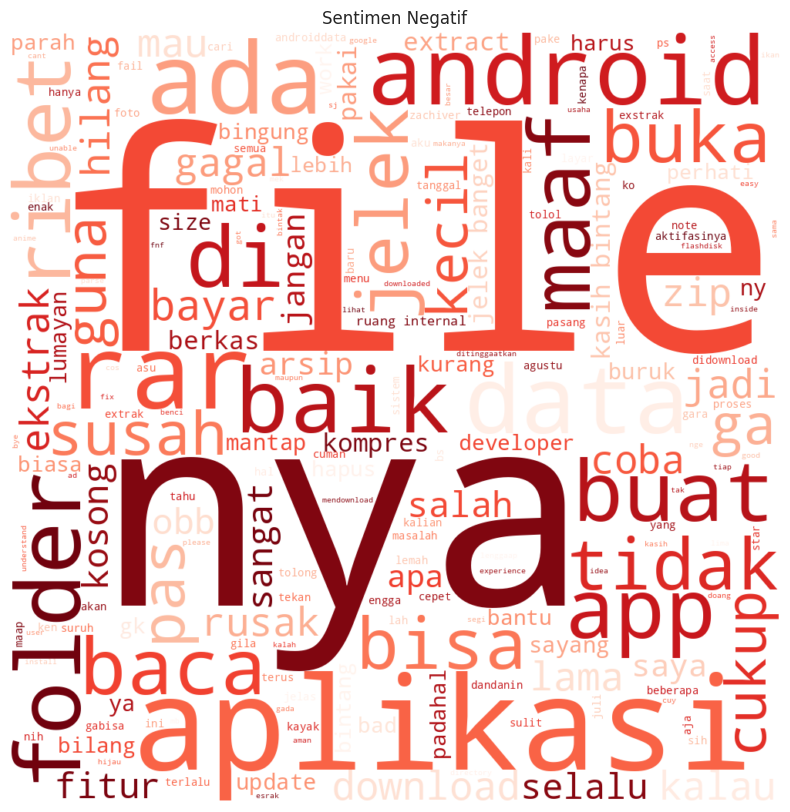

In [79]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [80]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    576
1     98
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [81]:
# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


In [82]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [84]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

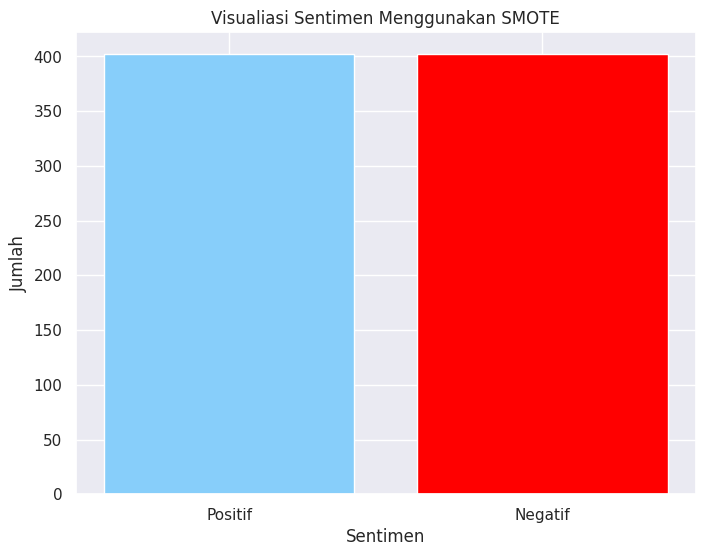

In [85]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [86]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [87]:
X_train_resampled.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23839128, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [88]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8522167487684729
Akurasi untuk c = 0.05: 0.8768472906403941
Akurasi untuk c = 0.25: 0.8866995073891626
Akurasi untuk c = 0.5: 0.8817733990147784
Akurasi untuk c = 0.75: 0.8817733990147784
Akurasi untuk c = 1: 0.8817733990147784


In [89]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [90]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8817733990147784 


In [91]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8818

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       174
           1       0.62      0.45      0.52        29

    accuracy                           0.88       203
   macro avg       0.77      0.70      0.73       203
weighted avg       0.87      0.88      0.87       203



In [92]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[166   8]
 [ 16  13]]

True Positives (TP) =  166

True Negatives (TN) =  13

False Positives (FP) =  8

False Negatives (FN) =  16

Accuracy =  0.8817733990147784


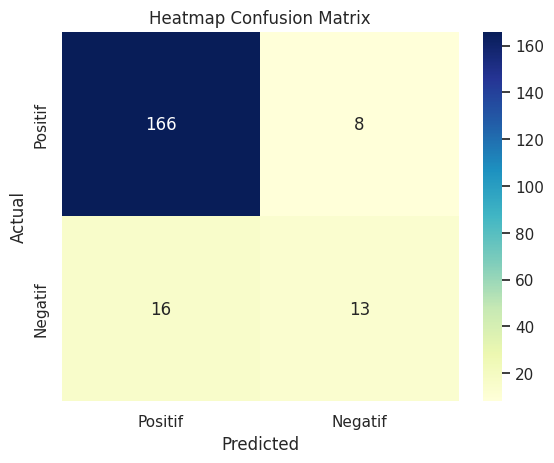

In [93]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [94]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [95]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8818


In [96]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1182


# **Testing**

In [97]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Sangat membantu membuka file yg besar dgn satuan yg diperlukan dgn cepat.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 88.87%
Probabilitas: 88.86879102765577 %


In [100]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : File saya ada yang rusak jadi Saat saya tekan fitur "coba untuk diarsipkan" ada file rusak/kesalahan tapi saat saya tekan fitur "perbaiki arsip" tidak ada file yang rusak. Apakah ini aplikasi pembohongan?
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 55.35%
Probabilitas: 55.34505037812529 %
